# Installing tensorflow

In [2]:
!pip install tensorflow


# importing and testing if tensorflow is working 

In [3]:
import tensorflow as tf

In [4]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [1]:
import tensorflow as tf

a = tf.constant(2)
b = tf.constant(3)
c = tf.add(a, b)

print(c.numpy())

5


# downloading Spurge Nettle from our Inaturalist and CVS file

In [6]:
import os
import time
import requests
import pandas as pd
from tqdm import tqdm  #adds a progress bar 
from urllib.parse import urlparse #helps extract the file extension (.jpg, .png, etc.) from a URL.
from os.path import splitext, basename #separate filename and extension from a URL path.
from IPython.display import Image, display #preview images inline.

# === 1) Load your CSV (same folder as the notebook) ===
CSV_NAME = "spurge-nettle.csv"  # <-- change if your filename differs
df = pd.read_csv(CSV_NAME)

# Quick peek so you can confirm column names
print(df.head(3))
print("Columns:", list(df.columns))

# === 2) Pick the image URL column automatically ===
# Add/adjust candidates if your CSV uses a different name
CANDIDATE_COLS = ["image_url", "photo_url", "url", "photo", "image"]
url_col = next((c for c in CANDIDATE_COLS if c in df.columns), None)
if url_col is None:
    raise ValueError(
        f"Could not find an image URL column. Look for one like {CANDIDATE_COLS} and set url_col manually."
    )

# Optional: prefer a stable identifier for filenames if present
id_col = next((c for c in ["id", "observation_id", "photo_id"] if c in df.columns), None)

# Unique, non-null URLs
image_urls = df[url_col].dropna().astype(str).unique()

# === 3) Where to save ===
OUT_DIR = "inat_images_spurge_nettle"
os.makedirs(OUT_DIR, exist_ok=True)

# === 4) Preview a few images inline (no download yet) ===
for url in image_urls[:5]:
    try:
        display(Image(url=url))
    except Exception as e:
        print(f"Preview failed for {url}: {e}")

# === 5) Helper to pick a reasonable filename ===
def filename_for(idx, url, row_id=None):
    # Try to preserve extension from URL; default to .jpg
    path = urlparse(url).path
    ext = splitext(path)[1].lower()
    if ext not in [".jpg", ".jpeg", ".png", ".gif", ".webp"]:
        ext = ".jpg"
    # Prefer an ID from the CSV when available
    if row_id is not None:
        return os.path.join(OUT_DIR, f"{row_id}{ext}")
    return os.path.join(OUT_DIR, f"photo_{idx}{ext}")

# Build a fast lookup from URL -> row id (if available)
id_by_url = {}
if id_col is not None:
    # Use first occurrence per URL
    first_indices = ~df[url_col].isna()
    for _, r in df.loc[first_indices, [url_col, id_col]].dropna(subset=[url_col]).iterrows():
        id_by_url.setdefault(str(r[url_col]), r[id_col])

# === 6) Download (resumable + polite) ===
headers = {"User-Agent": "iNat downloader for research (requests)"}  # polite header
errors = 0

for i, url in enumerate(tqdm(image_urls, desc="Downloading images")):
    row_id = id_by_url.get(url)
    out_path = filename_for(i, url, row_id=row_id)

    # Skip files already downloaded
    if os.path.exists(out_path):
        continue

    try:
        resp = requests.get(url, headers=headers, timeout=15)
        if resp.status_code == 200:
            with open(out_path, "wb") as f:
                f.write(resp.content)
        else:
            print(f"Failed {url} (HTTP {resp.status_code})")
            errors += 1
    except Exception as e:
        print(f"Error for {url}: {e}")
        errors += 1
        time.sleep(1)  # brief pause on error

    # Be gentle: tiny pause every 200 downloads
    if (i + 1) % 200 == 0:
        time.sleep(0.5)

print(f"Done. Saved images in: {OUT_DIR}. Errors: {errors}")


      id                                  uuid    observed_on_string  \
0  18042  b129acf2-22b7-49f1-a7d8-c9a8888b550e    May 07, 2009 09:21   
1  68317  528d10ac-74e1-4045-ac23-4d51802e5d47    May 11, 2011 11:25   
2  68318  0b311f52-e245-4997-8b52-4859c70a0101  March 26, 2012 12:16   

  observed_on         time_observed_at                   time_zone  user_id  \
0  2009-05-07  2009-05-07 16:21:00 UTC  Pacific Time (US & Canada)      604   
1  2011-05-11  2011-05-11 15:25:00 UTC  Eastern Time (US & Canada)     5464   
2  2012-03-26  2012-03-26 16:16:00 UTC  Eastern Time (US & Canada)     5464   

         user_login  user_name               created_at  ... geoprivacy  \
0         eric_hunt  Eric Hunt  2011-05-24 23:27:18 UTC  ...        NaN   
1  guerillafarmer99   SharpJ99  2012-04-21 00:00:23 UTC  ...        NaN   
2  guerillafarmer99   SharpJ99  2012-04-21 00:02:59 UTC  ...        NaN   

  taxon_geoprivacy coordinates_obscured positioning_method positioning_device  \
0           

Error for https://inaturalist-open-data.s3.amazonaws.com/photos/523401569/medium.jpg: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


Done. Saved images in: inat_images_spurge_nettle. Errors: 7


# downloading Texas Bull Nettle from our Inaturalist and CVS file

In [1]:
import os
import time
import requests
import pandas as pd
from tqdm import tqdm
from urllib.parse import urlparse
from os.path import splitext
from IPython.display import Image, display

# === 1) Load your CSV (make sure it's in the same folder as the notebook) ===
CSV_NAME = "texas-bull-nettle.csv"
df = pd.read_csv(CSV_NAME)

# Peek at the data
print(df.head(3))
print("Columns:", list(df.columns))

# === 2) Find the URL column automatically ===
CANDIDATE_COLS = ["image_url", "photo_url", "url", "photo", "image"]
url_col = next((c for c in CANDIDATE_COLS if c in df.columns), None)
if url_col is None:
    raise ValueError(f"No URL column found. Check columns: {list(df.columns)}")

# Optional: use an ID for filenames if available
id_col = next((c for c in ["id", "observation_id", "photo_id"] if c in df.columns), None)

# Unique, cleaned URLs
image_urls = df[url_col].dropna().astype(str).unique()

# === 3) Folder to save images ===
OUT_DIR = "inat_images_texas_bull_nettle"
os.makedirs(OUT_DIR, exist_ok=True)

# === 4) Preview a few images in Jupyter ===
for url in image_urls[:5]:
    try:
        display(Image(url=url))
    except Exception as e:
        print(f"Preview failed for {url}: {e}")

# === 5) Filename helper ===
def filename_for(idx, url, row_id=None):
    path = urlparse(url).path
    ext = splitext(path)[1].lower()
    if ext not in [".jpg", ".jpeg", ".png", ".gif", ".webp"]:
        ext = ".jpg"
    if row_id is not None:
        return os.path.join(OUT_DIR, f"{row_id}{ext}")
    return os.path.join(OUT_DIR, f"photo_{idx}{ext}")

# Map URL → ID (if available)
id_by_url = {}
if id_col is not None:
    for _, r in df[[url_col, id_col]].dropna(subset=[url_col]).iterrows():
        u = str(r[url_col])
        if u not in id_by_url:
            id_by_url[u] = r[id_col]

# === 6) Download with retry + polite pause ===
headers = {"User-Agent": "iNat downloader for research"}
errors = 0

for i, url in enumerate(tqdm(image_urls, desc="Downloading images")):
    row_id = id_by_url.get(url)
    out_path = filename_for(i, url, row_id=row_id)

    if os.path.exists(out_path):
        continue  # skip already downloaded

    try:
        resp = requests.get(url, headers=headers, timeout=15)
        if resp.status_code == 200:
            with open(out_path, "wb") as f:
                f.write(resp.content)
        else:
            print(f"Failed {url} (HTTP {resp.status_code})")
            errors += 1
    except Exception as e:
        print(f"Error for {url}: {e}")
        errors += 1
        time.sleep(1)

    if (i + 1) % 200 == 0:
        time.sleep(0.5)

print(f"Done. Saved images in: {OUT_DIR}. Errors: {errors}")


       id                                  uuid  \
0   98836  216cfaf8-b8ac-41a8-b345-ed307645dce7   
1  232803  daa6a01f-7dfd-418b-ade7-e0c6bb95929c   
2  242021  063d7d74-53d6-4046-90e5-3ac25fed083c   

                        observed_on_string observed_on  \
0                      July 04, 2012 18:14  2012-07-04   
1  Tue Apr 09 2013 08:14:55 GMT-0500 (CDT)  2013-04-09   
2  Sun Apr 21 2013 11:41:17 GMT-0500 (CDT)  2013-04-21   

          time_observed_at                   time_zone  user_id  user_login  \
0  2012-07-04 23:14:00 UTC  Central Time (US & Canada)     5429  gaberlunzi   
1  2013-04-09 13:14:55 UTC  Central Time (US & Canada)     9685     mikaelb   
2  2013-04-21 16:41:17 UTC  Central Time (US & Canada)     9685     mikaelb   

        user_name               created_at  ... geoprivacy taxon_geoprivacy  \
0             NaN  2012-07-05 14:30:26 UTC  ...        NaN              NaN   
1  Mikael Behrens  2013-04-09 15:04:35 UTC  ...        NaN              NaN   
2  Mikae

Done. Saved images in: inat_images_texas_bull_nettle. Errors: 0


In [2]:
import os
import pandas as pd

# ---- CONFIG: names & folders ----
DATA = [
    ("spurge-nettle.csv",        "inat_images_spurge_nettle"),
    ("texas-bull-nettle.csv",    "inat_images_texas_bull_nettle"),
]

CANDIDATE_URL_COLS = ["image_url", "photo_url", "url", "photo", "image"]
MIN_BYTES_TINY = 1024  # under 1KB likely broken

def find_url_col(df):
    for c in CANDIDATE_URL_COLS:
        if c in df.columns:
            return c
    raise ValueError(f"Could not find a URL column. Available columns: {list(df.columns)}")

def count_files(folder):
    if not os.path.exists(folder):
        return 0
    return sum(
        1 for f in os.listdir(folder)
        if os.path.isfile(os.path.join(folder, f))
    )

def tiny_files(folder, min_bytes=MIN_BYTES_TINY):
    if not os.path.exists(folder):
        return []
    tiny = []
    for f in os.listdir(folder):
        p = os.path.join(folder, f)
        if os.path.isfile(p):
            try:
                if os.path.getsize(p) < min_bytes:
                    tiny.append(f)
            except OSError:
                tiny.append(f"[stat_error]{f}")
    return tiny

summary = []

for csv_name, folder in DATA:
    # Load CSV
    df = pd.read_csv(csv_name)
    url_col = find_url_col(df)

    # Expected = unique, non-null URLs
    urls = df[url_col].dropna().astype(str).unique()
    expected = len(urls)

    # Downloaded = number of files present
    downloaded = count_files(folder)

    # Suspicious tiny files
    tiny = tiny_files(folder)
    tiny_count = len(tiny)

    # Quick status
    summary.append({
        "csv": csv_name,
        "folder": folder,
        "url_column": url_col,
        "expected_unique_urls": expected,
        "downloaded_files": downloaded,
        "missing_or_extra": expected - downloaded,  # positive => missing; negative => extras in folder
        "tiny_suspicious_files": tiny_count
    })

# Print the summary
for s in summary:
    print(f"=== {s['csv']} → {s['folder']} ===")
    print(f"URL column:              {s['url_column']}")
    print(f"Expected (unique URLs):  {s['expected_unique_urls']}")
    print(f"Downloaded (files):      {s['downloaded_files']}")
    miss_extra = s['missing_or_extra']
    if miss_extra > 0:
        print(f"Missing files:           {miss_extra}")
    elif miss_extra < 0:
        print(f"Extra files in folder:   {-miss_extra}")
    else:
        print("Counts match ✔")
    print(f"Tiny/suspicious files:   {s['tiny_suspicious_files']}")
    print()

# (Optional) show a few examples of tiny files for the first dataset if any
for csv_name, folder in DATA:
    t = tiny_files(folder)
    if t:
        print(f"Examples of tiny files in {folder}: {t[:10]}")
    else:
        print(f"No tiny files detected in {folder}.")


=== spurge-nettle.csv → inat_images_spurge_nettle ===
URL column:              image_url
Expected (unique URLs):  11537
Downloaded (files):      11530
Missing files:           7
Tiny/suspicious files:   0

=== texas-bull-nettle.csv → inat_images_texas_bull_nettle ===
URL column:              image_url
Expected (unique URLs):  10006
Downloaded (files):      10006
Counts match ✔
Tiny/suspicious files:   0

No tiny files detected in inat_images_spurge_nettle.
No tiny files detected in inat_images_texas_bull_nettle.


In [13]:
%pip install --upgrade pip
%pip install tensorflow


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 548.1 kB/s eta 0:00:03
   ----------- ---------------------------- 0.5/1.8 MB 548.1 kB/s eta 0:00:03
   ----------------- ---------------------- 0.8/1.8 MB 618.8 kB/s eta 0:00:02
   ----------------------- ---------------- 1.0/1.8 MB 701.5 kB/s eta 0:00:02
   ---------------------------------------- 1.8/1.8 MB 1.1 MB/s eta

# Labeling flowering and non-flowering manually 

In [ ]:
# %pip install ipywidgets   # ← run once if needed, then restart the kernel

import os, glob, shutil
from IPython.display import display, clear_output
import ipywidgets as widgets
from PIL import Image
import matplotlib.pyplot as plt

# ----- CONFIG -----
SOURCE = "random_1000_flowers"     # folder with unsorted images
OUTROOT = "1000_labeled_flowers"   # destination root
FLOWER_DIR = os.path.join(OUTROOT, "flower")
NON_DIR    = os.path.join(OUTROOT, "non_flower")

os.makedirs(FLOWER_DIR, exist_ok=True)
os.makedirs(NON_DIR, exist_ok=True)

# Collect remaining images to label (skip hidden + non-images)
queue = [p for p in glob.glob(os.path.join(SOURCE, "*"))
         if p.lower().endswith((".jpg",".jpeg",".png")) and os.path.isfile(p)]
idx = 0

# Widgets
img_out = widgets.Output()
status  = widgets.HTML()
btn_flower = widgets.Button(description=" Flower", button_style="success")
btn_non    = widgets.Button(description=" Non-Flower", button_style="danger")
btn_skip   = widgets.Button(description=" Skip")
btn_back   = widgets.Button(description=" Back")

def show():
    img_out.clear_output(wait=True)
    remaining = len(queue) - idx
    f_count = len([f for f in os.listdir(FLOWER_DIR) if f.lower().endswith(('.jpg','.jpeg','.png'))])
    n_count = len([f for f in os.listdir(NON_DIR) if f.lower().endswith(('.jpg','.jpeg','.png'))])
    if idx >= len(queue):
        status.value = f" Done. Counts — flower: {f_count}, non_flower: {n_count}"
        with img_out: print("No more images to label.")
        return
    path = queue[idx]
    status.value = f"{idx+1}/{len(queue)}  |  remaining: {remaining}  |  flower: {f_count}  non_flower: {n_count}"
    with img_out:
        clear_output(wait=True)
        plt.figure(figsize=(6,6))
        try:
            im = Image.open(path).convert("RGB")
        except Exception as e:
            print(f" Unable to open {os.path.basename(path)}: {e}")
            return
        plt.imshow(im); plt.axis("off")
        plt.title(os.path.basename(path))
        plt.show()

def unique_dest(dst_dir, src_path):
    base = os.path.join(dst_dir, os.path.basename(src_path))
    root, ext = os.path.splitext(base)
    k, dst = 1, base
    while os.path.exists(dst):
        dst = f"{root}__{k}{ext}"
        k += 1
    return dst

def move_to(dst_dir):
    global idx
    if idx >= len(queue): return
    src = queue[idx]
    dst = unique_dest(dst_dir, src)
    shutil.move(src, dst)
    idx += 1
    show()

def skip(_):
    global idx
    # push current item to end of queue
    if idx < len(queue):
        queue.append(queue.pop(idx))
    show()

def back(_):
    global idx
    idx = max(0, idx-1)
    show()

btn_flower.on_click(lambda _: move_to(FLOWER_DIR))
btn_non.on_click(lambda _: move_to(NON_DIR))
btn_skip.on_click(skip)
btn_back.on_click(back)

display(widgets.HBox([btn_back, btn_skip, btn_flower, btn_non]), status, img_out)
show()


# Donwloading random images from folders 

In [ ]:
import os
import random
import shutil

# --- 1. Configure your folders ---
source_folder1 = "inat_images_texas_bull_nettle"   # First source folder
source_folder2 = "inat_images_spurge_nettle"       # Second source folder
destination_folder = "random_300_flowers"          # Destination folder
num_images_per_folder = 150                        # How many to copy from each

# --- 2. Make sure destination folder exists ---
os.makedirs(destination_folder, exist_ok=True)

# --- 3. Helper function to randomly copy files ---
def copy_random_images(source, dest, n):
    all_images = [f for f in os.listdir(source)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if not all_images:
        print(f" No images found in {source}")
        return
    
    selected = random.sample(all_images, min(n, len(all_images)))
    for img in selected:
        src_path = os.path.join(source, img)
        dst_path = os.path.join(dest, f"{os.path.basename(source)}_{img}")  # avoid overwriting
        shutil.copy(src_path, dst_path)
    print(f" Copied {len(selected)} images from {source}")

# --- 4. Copy from both folders ---
copy_random_images(source_folder1, destination_folder, num_images_per_folder)
copy_random_images(source_folder2, destination_folder, num_images_per_folder)

print(f"\n Total images in {destination_folder}: {len(os.listdir(destination_folder))}")


# Import TensorFlow and other necessary libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# using our dataset of labeled flowers check for the directories

In [2]:
import pathlib
import tensorflow as tf

# Point directly to your local dataset folder
data_dir = pathlib.Path("300_labeled_flowers")  # folder you want to use 

# verify if folder exists
if not data_dir.exists():
    raise FileNotFoundError(f"Dataset folder not found at {data_dir.resolve()}")

# List subdirectories (should show ['flower', 'non_flower'])
print("Found class folders:", [p.name for p in data_dir.iterdir() if p.is_dir()])


Found class folders: ['.ipynb_checkpoints', 'flower', 'non_flower']


# check if images are in our labeled directory

In [3]:
import pathlib

data_dir = pathlib.Path("300_labeled_flowers")  # <-- make sure folder exists

# Count .jpg and .jpeg images in all subfolders
jpg_count  = len(list(data_dir.glob('*/*.jpg')))
jpeg_count = len(list(data_dir.glob('*/*.jpeg')))
image_count = jpg_count + jpeg_count

print(f"Found {image_count} images total ({jpg_count} .jpg + {jpeg_count} .jpeg)")



Found 301 images total (174 .jpg + 127 .jpeg)


# determine valid flowering images from our labeled data set 

In [4]:
import pathlib

data_dir = pathlib.Path("300_labeled_flowers")

# Only include actual files, ignore directories
flowers = [p for p in data_dir.glob('flower/*') if p.is_file()]
print(f"Found {len(flowers)} valid flower images.")



Found 240 valid flower images.


# determine valid non-flowering images from our labled data set 

In [5]:
import pathlib

data_dir = pathlib.Path("300_labeled_flowers")

# Only include actual files, ignore directories
non_flowers = [p for p in data_dir.glob('non_flower/*') if p.is_file()]
print(f"Found {len(non_flowers)} valid non_flower images.")

Found 61 valid non_flower images.


# define parameters for the loader

In [6]:
batch_size = 32
img_height = 180
img_width = 180

# Use 80% of the images for training and 20% for validation.

In [7]:
# Training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # 20% of data used for validation
    subset="training",     # THIS is the training split
    seed=123,              # ensures the same split every time
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 305 files belonging to 2 classes.
Using 244 files for training.


In [8]:
# Validation dataset (important: must use the same split & seed)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",   
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 305 files belonging to 2 classes.
Using 61 files for validation.


# Show class names

In [9]:
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['flower', 'non_flower']


# Produce the first nine images from the training dataset:

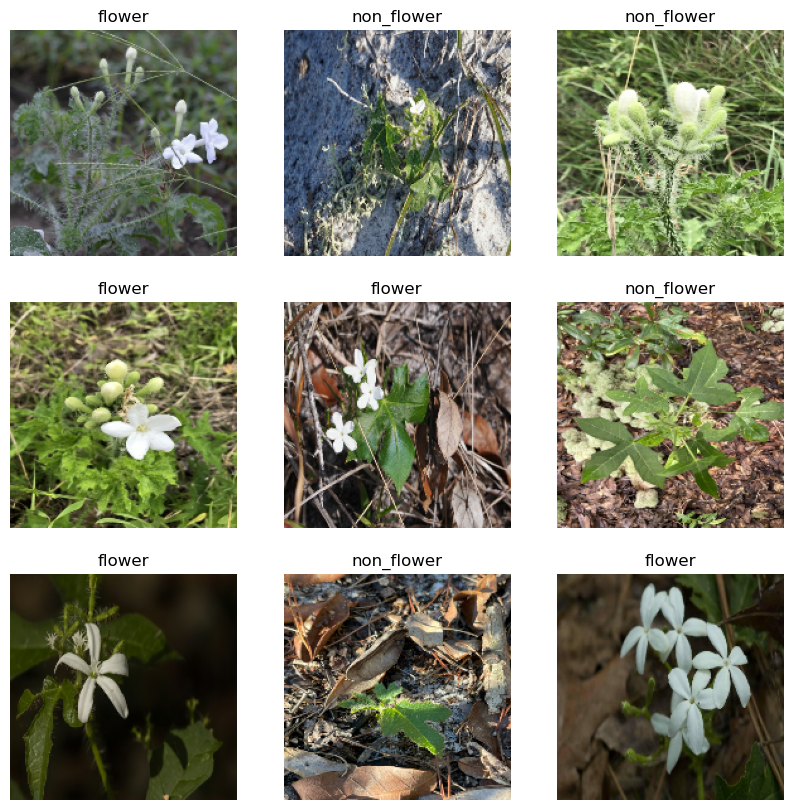

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # take 1 batch
    for i in range(9):  # show first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])  # <-- ensure label is int
        plt.axis("off")


In [11]:
for image_batch, labels_batch in train_ds.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)


Image batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


# Configure the dataset for performance

In [12]:
import tensorflow as tf

AUTOTUNE = tf.data.AUTOTUNE

# Cache keeps data in memory (or on disk) after first load.
# Shuffle ensures training batches are different each epoch.
# Prefetch overlaps preprocessing and model execution.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# For validation, no need to shuffle
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [13]:
normalization_layer = layers.Rescaling(1./255)

# data augmentation for over fitting

In [14]:
# safer random crop parameters
crop_height = int(img_height * 0.9)  # crop 90% of height --> we could change the cropping to 97
crop_width  = int(img_width * 0.9)   # crop 90% of width

#Random crop requires the crop_height and crop_width so it has some room to move 

# check if the order is important, i think first should be crop TODO
# order is good this pipeline that im using is the most common one 
# for poster try to visualize data augmentation use chatgptThe correct logic (what you already have):
# correct order: RandomFlip, RandomRotation, RandomZoom, ...... RandomCrop, RandomResizing

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2),
    layers.RandomCrop(crop_height, crop_width), # check this one to see if we can change the croping point
    layers.Resizing(img_height, img_width)  # resize back to original
])


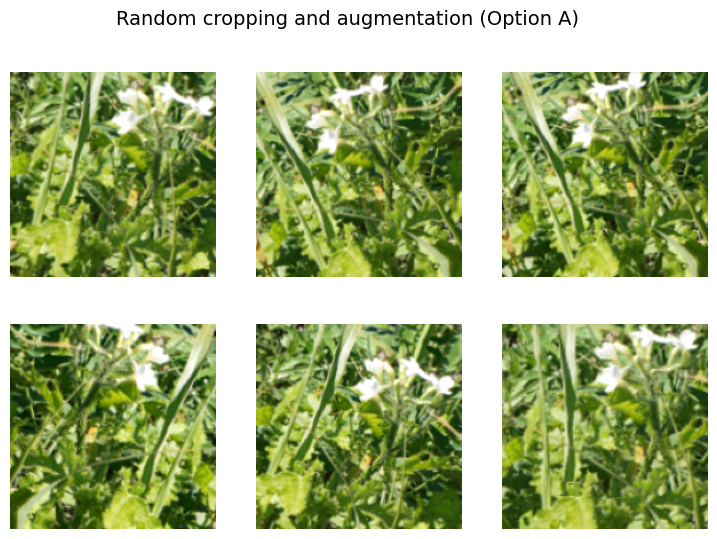

In [15]:
import matplotlib.pyplot as plt

# Take a small batch from your training dataset
for images, _ in train_ds.take(1):
    # Apply your data_augmentation multiple times to the same batch
    augmented_sets = [data_augmentation(images, training=True) for _ in range(6)]

    plt.figure(figsize=(9, 6))
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(augmented_sets[i][0].numpy().astype("uint8"))
        plt.axis("off")
    plt.suptitle("Random cropping and augmentation (Option A)", fontsize=14)
    plt.show()
    break


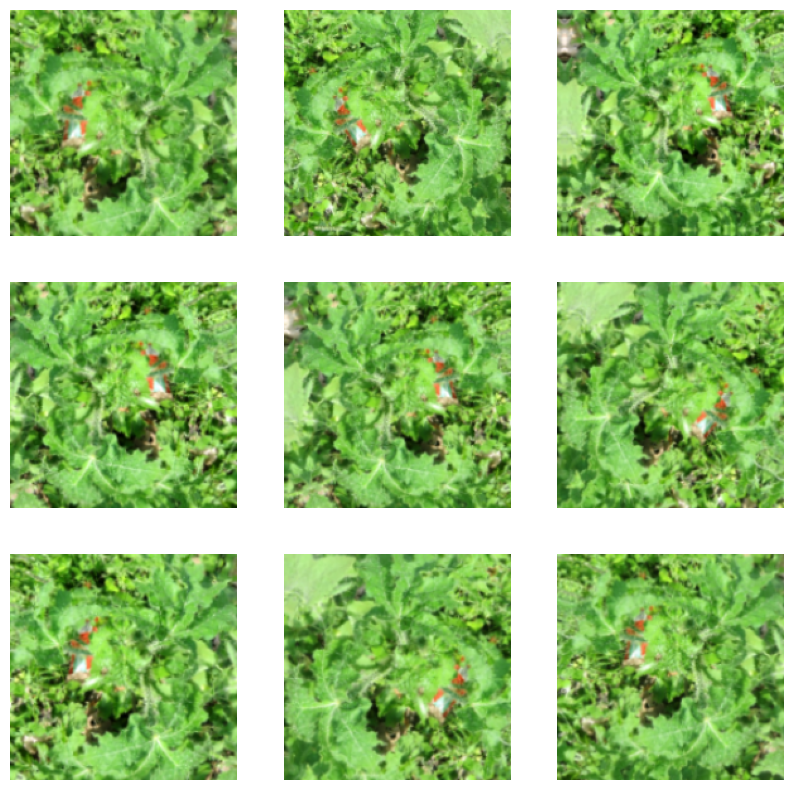

In [16]:
import matplotlib.pyplot as plt

# this code allows us to see whats happening while data augementation occurs 
# overfitting and data augmentation:
#        overfitting: the difference in accuracy between training and validation accuracy is noticeable
#        data-augmentation: takes the approach of generating additional training data from your existing examples by augmenting them using random transformations
 
for images, _ in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        augmented = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented[0].numpy().astype("uint8"))
        plt.axis("off")
    break


# training the model

In [19]:

# it seemed the model was declared twice, 
# first was without data augmentation but now that I am using data augemntation the first one is not required

#removed first model declaration and kept the data augmentation version
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

# compile and train the model

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# why the name of the variable?
# fix after trasnfering everything to cashew
history = model.fit(
    train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE),
    validation_data=val_ds.cache().prefetch(tf.data.AUTOTUNE),
    epochs=50,
    callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=10, restore_best_weights=True)]
)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5328 - loss: 1.0435 - val_accuracy: 0.8525 - val_loss: 0.4370
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7746 - loss: 0.5569 - val_accuracy: 0.8525 - val_loss: 0.4710
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7746 - loss: 0.5475 - val_accuracy: 0.8525 - val_loss: 0.4520
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7746 - loss: 0.5280 - val_accuracy: 0.8525 - val_loss: 0.3989
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7746 - loss: 0.5129 - val_accuracy: 0.8525 - val_loss: 0.3946
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7746 - loss: 0.4931 - val_accuracy: 0.8525 - val_loss: 0.4219
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.7746 - loss: 0.5028 - val_accuracy: 0.8525 - val_loss: 0.3460
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7746 - loss: 0.4365 - val_accuracy: 0.8689 - val_loss: 0.4586
Epoch 9/50


# Model summary 

In [21]:
#showcasing what the model has learned and trained by looking at the summary

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 180, 180, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 90, 90, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 90, 90, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 45, 45, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 45, 45, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 22, 22, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (32, 22, 22, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 30976)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 128)                   │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputs (Dense)                      │ (32, 2)                     │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,966,696 (45.65 MB)

 Trainable params: 3,988,898 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,977,798 (30.43 MB)

# Adding early stopping

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[early_stopping])


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 978ms/step - accuracy: 0.9426 - loss: 0.1602 - val_accuracy: 0.8852 - val_loss: 0.2520
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9631 - loss: 0.1342 - val_accuracy: 0.8852 - val_loss: 0.2100
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 978ms/step - accuracy: 0.9303 - loss: 0.2090 - val_accuracy: 0.9016 - val_loss: 0.2208
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9344 - loss: 0.1979 - val_accuracy: 0.8852 - val_loss: 0.1838
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9467 - loss: 0.1626 - val_accuracy: 0.8852 - val_loss: 0.2135
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9672 - loss: 0.1080 - val_accuracy: 0.9016 - val_loss: 0.2206
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9508 - loss: 0.1290 - val_accuracy: 0.9180 - val_loss: 0.1944
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9672 - loss: 0.1082 - val_accuracy: 0.9016 - val_loss: 0.1868
Epoch 9/

In [23]:
epochs = 46
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9549 - loss: 0.1461 - val_accuracy: 0.8852 - val_loss: 0.2332
Epoch 2/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 903ms/step - accuracy: 0.9467 - loss: 0.1497 - val_accuracy: 0.9016 - val_loss: 0.1755
Epoch 3/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 932ms/step - accuracy: 0.9549 - loss: 0.1412 - val_accuracy: 0.9180 - val_loss: 0.1759
Epoch 4/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 969ms/step - accuracy: 0.9549 - loss: 0.1268 - val_accuracy: 0.8689 - val_loss: 0.2760
Epoch 5/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 992ms/step - accuracy: 0.9344 - loss: 0.1959 - val_accuracy: 0.8689 - val_loss: 0.2280
Epoch 6/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 995ms/step - accuracy: 0.9590 - loss: 0.1281 - val_accuracy: 0.9016 - val_loss: 0.2201
Epoch 7/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9385 - loss: 0.1191 - val_accuracy: 0.9016 - val_loss: 0.2251
Epoch 8/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 992ms/step - accuracy: 0.9467 - loss: 0.1154 - val_accuracy: 0.9180 - val_loss: 0.22

# visualizing training results for accuracy

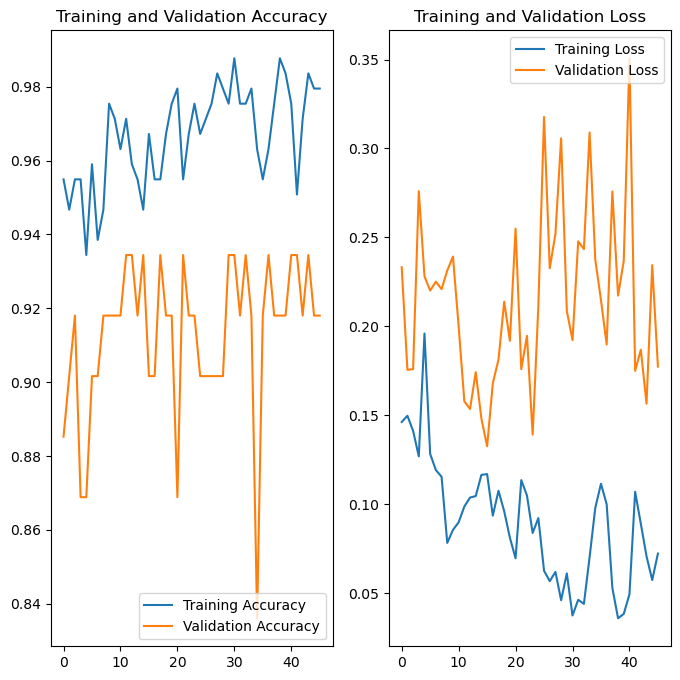

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# visualize training results 

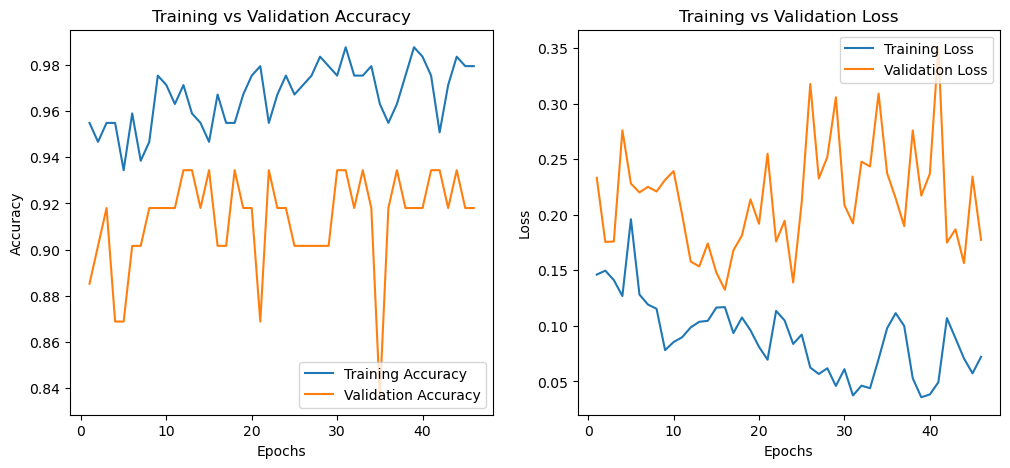

In [25]:
# judgying by the loss plot i think we need to increase the epoch number dramatically try 100, then 1000 TODO
# fix after trasnfering to cashew
import matplotlib.pyplot as plt

# Extract metrics from history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')
plt.savefig("my_plot.png")


plt.show()


# Saving the model

In [26]:
# verify this is having all augmentation strategies TODO

model.save("my_model.keras")


# my suggestion for file name
# id

# save in txt file, every single detail:
# epoch #, patience, all augmentation details
# fix after trasnfering to cashew 

In [27]:
import tensorflow as tf
model = tf.keras.models.load_model("my_model.keras", compile=False)


# test model with individual random images

In [28]:
# Path to new image 
# this flower is a random flower from a file titled random-1000-flowers
# this picture should be classified as "flowering" and should pass the test
img_path = "random_300_flowers/inat_images_spurge_nettle_8536093.jpg"

# Load and preprocess
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to '{}' with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
This image most likely belongs to 'flower' with a 99.44% confidence.


In [29]:
# Path to new image 
# this flower is a random flower from a file titled random-1000-flowers
# this picture should be classified as "flowering" and should pass the test
img_path = "random_300_flowers/inat_images_spurge_nettle_43409314.jpeg"

# Load and preprocess
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to '{}' with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
This image most likely belongs to 'flower' with a 100.00% confidence.


In [30]:
# Path to new image 
# this flower is a random flower from a file titled random-1000-flowers
# this picture should be calssified as "non-flowering" and should pass the test
img_path = "random_300_flowers/inat_images_texas_bull_nettle_15089784.jpg"

# Load and preprocess
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to '{}' with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
This image most likely belongs to 'non_flower' with a 62.50% confidence.


In [31]:
# Path to new image 
# this flower is a random flower from a file titled random-1000-flowers
# this picture should be calssified as "non-flowering" and should pass the test
img_path = "random_300_flowers/inat_images_texas_bull_nettle_40302489.jpg"

# Load and preprocess
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to '{}' with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
This image most likely belongs to 'non_flower' with a 63.63% confidence.


# Testing 3 folders containing unlabeled random images - 75/25, 50-50, and 25-75

In [32]:
import flower_trainer

# assumes you already have these from training:
# model, class_names, img_height, img_width

folder = "75-25"  # or any other folder you want to test
pct, (flowering, total) = flower_trainer.percent_flowering(
    model, folder, img_height, img_width, class_names, return_counts=True
)
print(f"{pct:.2f}% of the images in '{folder}' were classified as flowering "
      f"({flowering}/{total}).")


76.00% of the images in '75-25' were classified as flowering (76/100).


In [33]:
import flower_trainer

# assumes you already have these from training:
# model, class_names, img_height, img_width

folder = "50-50"  # or any other folder you want to test
pct, (flowering, total) = flower_trainer.percent_flowering(
    model, folder, img_height, img_width, class_names, return_counts=True
)
print(f"{pct:.2f}% of the images in '{folder}' were classified as flowering "
      f"({flowering}/{total}).")

51.00% of the images in '50-50' were classified as flowering (51/100).


In [34]:
import flower_trainer

# assumes you already have these from training:
# model, class_names, img_height, img_width

folder = "25-75"  # or any other folder you want to test
pct, (flowering, total) = flower_trainer.percent_flowering(
    model, folder, img_height, img_width, class_names, return_counts=True
)
print(f"{pct:.2f}% of the images in '{folder}' were classified as flowering "
      f"({flowering}/{total}).")

32.00% of the images in '25-75' were classified as flowering (32/100).
